In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.isnull().values.any()

False

In [5]:
df.apply(pd.isnull).sum()

Category    0
Message     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [9]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.2,random_state=101)

In [11]:
X_train.shape

(4457,)

In [12]:
X_test.shape

(1115,)

In [13]:
type(X_train)

pandas.core.series.Series

In [14]:
type(X_test)

pandas.core.series.Series

In [15]:
X_train[:4]

1398    Then we wait 4 u lor... No need 2 feel bad lar...
1084    Wat makes some people dearer is not just de ha...
1086    FR'NDSHIP is like a needle of a clock. Though ...
2655                          Its sarcasm.. .nt scarcasim
Name: Message, dtype: object

In [16]:
type(y_train)

pandas.core.series.Series

In [17]:
y_train[:4]

1398    0
1084    0
1086    0
2655    0
Name: spam, dtype: int64

In [18]:
type(X_train.values)

numpy.ndarray

In [19]:
v=CountVectorizer()
X_train_cv=v.fit_transform(X_train)
X_train_cv

<4457x7774 sparse matrix of type '<class 'numpy.int64'>'
	with 59893 stored elements in Compressed Sparse Row format>

In [20]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
X_train_cv.shape

(4457, 7774)

In [22]:
v.get_feature_names_out()[1000:1050]

array(['answer', 'answered', 'answerin', 'answering', 'answers', 'antha',
       'anthony', 'anti', 'antibiotic', 'any', 'anybody', 'anyhow',
       'anymore', 'anyone', 'anyones', 'anyplaces', 'anythiing',
       'anythin', 'anything', 'anythingtomorrow', 'anytime', 'anyway',
       'anyways', 'anywhere', 'aom', 'apart', 'apartment', 'apes',
       'apeshit', 'aphex', 'apnt', 'apo', 'apologetic', 'apologise',
       'apologize', 'apology', 'app', 'apparently', 'appeal', 'appear',
       'applausestore', 'applebees', 'application', 'apply', 'applyed',
       'appointment', 'appointments', 'appreciate', 'appreciated',
       'approaching'], dtype=object)

In [23]:
v.get_feature_names_out().shape

(7774,)

In [24]:
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',

In [25]:
v.vocabulary_

{'then': 6863,
 'we': 7454,
 'wait': 7387,
 'lor': 4241,
 'no': 4837,
 'need': 4767,
 'feel': 2818,
 'bad': 1218,
 'lar': 4051,
 'wat': 7433,
 'makes': 4361,
 'some': 6336,
 'people': 5193,
 'dearer': 2195,
 'is': 3771,
 'not': 4873,
 'just': 3903,
 'de': 2188,
 'happiness': 3353,
 'dat': 2172,
 'when': 7520,
 'meet': 4461,
 'them': 6859,
 'but': 1593,
 'pain': 5101,
 'miss': 4546,
 'dem': 2242,
 'fr': 2987,
 'ndship': 4756,
 'like': 4143,
 'needle': 4771,
 'of': 4937,
 'clock': 1862,
 'though': 6900,
 'in': 3663,
 'same': 5936,
 'nt': 4892,
 'able': 769,
 'met': 4499,
 'evn': 2691,
 'if': 3625,
 'itz': 3795,
 'only': 4991,
 '4few': 516,
 'seconds': 6017,
 'bt': 1558,
 'alwys': 950,
 'stay': 6497,
 'conected': 1968,
 'gud': 3283,
 '9t': 749,
 'its': 3791,
 'sarcasm': 5949,
 'scarcasim': 5978,
 'tell': 6790,
 'me': 4442,
 'they': 6874,
 're': 5633,
 'female': 2829,
 'how': 3543,
 'you': 7735,
 'throwing': 6913,
 'deciding': 2205,
 'what': 7514,
 'all': 929,
 'to': 6970,
 'get': 3133,
 '

In [26]:
v.get_feature_names_out()[7501]

'were'

In [27]:
X_train_np=X_train_cv.toarray()
X_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
np.where(X_train_np[0]!=0)

(array([1218, 2818, 4051, 4241, 4767, 4837, 6863, 7387, 7454], dtype=int64),)

In [30]:
X_train_np[0][1218]

1

In [31]:
v.get_feature_names_out()[1218]

'bad'

In [32]:
X_train[:4]

1398    Then we wait 4 u lor... No need 2 feel bad lar...
1084    Wat makes some people dearer is not just de ha...
1086    FR'NDSHIP is like a needle of a clock. Though ...
2655                          Its sarcasm.. .nt scarcasim
Name: Message, dtype: object

In [33]:
X_train[:4][1398]

'Then we wait 4 u lor... No need 2 feel bad lar...'

In [34]:
model=MultinomialNB()
model.fit(X_train_cv,y_train)

MultinomialNB()

In [35]:
X_test_cv=v.transform(X_test)

In [36]:
y_pred=model.predict(X_test_cv)

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       994
           1       0.88      0.98      0.93       121

    accuracy                           0.98      1115
   macro avg       0.94      0.98      0.96      1115
weighted avg       0.99      0.98      0.98      1115



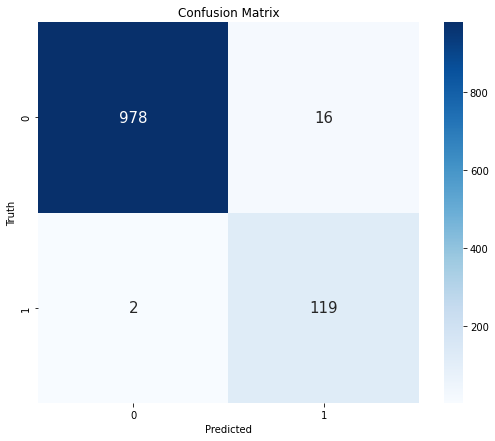

In [38]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [39]:
emails=[
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)